<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W6D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [59]:
from scipy.stats import f_oneway

In [157]:
import seaborn as sns

In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [115]:
df = pd.read_csv('/content/sample_data/global_power_plant_database.csv')
df.head()

<ipython-input-115-5d3833f23ab4>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [117]:
missing_values = df.isnull().sum()
missing_values

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


Fields:

	- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
	- `country_long` (text): longer form of the country designation
	- `name` (text): name or title of the power plant, generally in Romanized form
	- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
	- `capacity_mw` (number): electrical generating capacity in megawatts
	- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `primary_fuel` (text): energy source used in primary electricity generation or export
	- `other_fuel1` (text): energy source used in electricity generation or export
	- `other_fuel2` (text): energy source used in electricity generation or export
	- `other_fuel3` (text): energy source used in electricity generation or export
	- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
	- `owner` (text): majority shareholder of the power plant, generally in Romanized form
	- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
	- `url` (text): web document corresponding to the `source` field
	- `geolocation_source` (text): attribution for geolocation information
	- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
	- `year_of_capacity_data` (number): year the capacity information was reported
	- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
	- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
	- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
	- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
	- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
	- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
	- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
	- `generation_data_source` (text): attribution for the reported generation information
	- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013 (see [2])
	- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 (see [2])
	- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 (see [2])
	- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 (see [2])
	- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 (see [2])
	- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 (see section on this field below)
	- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 (see section on this field below)
	- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015 (see section on this field below)
	- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016 (see section on this field below)
	- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 (see section on this field below)

In [118]:
df['commissioning_year'] = pd.to_datetime(df['commissioning_year'], format='%Y', errors='coerce').dt.year

In [119]:
num_columns = ['country_long', 'name', 'commissioning_year', 'primary_fuel',
               'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
               'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
               'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015',
               'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']

numerical_data = df[num_columns]


In [120]:
# Drop rows with missing values in numerical columns
numerical_data_cleaned = numerical_data.dropna(subset=num_columns[4:], how='all')
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               16500
primary_fuel                         0
generation_gwh_2013              27053
generation_gwh_2014              26244
generation_gwh_2015              25267
generation_gwh_2016              24326
generation_gwh_2017              23970
generation_gwh_2018              23833
generation_gwh_2019              23811
estimated_generation_gwh_2013    17350
estimated_generation_gwh_2014    16967
estimated_generation_gwh_2015    16420
estimated_generation_gwh_2016    15900
estimated_generation_gwh_2017      332
dtype: int64

In [121]:
# Select only the generation_gwh columns for statistics
generation_gwh_columns = ['name', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                          'generation_gwh_2016']

# Drop rows with missing values in generation_gwh columns
df_cleaned_1 = numerical_data_cleaned.dropna(subset=generation_gwh_columns[1:], how='any')

In [122]:
# Calculate statistics for generation_gwh columns
generation_statistics = df_cleaned_1[generation_gwh_columns[1:]].mean()

# Print statistics for generation_gwh columns
print("Statistics for 'generation_gwh' columns:")
print(generation_statistics)

Statistics for 'generation_gwh' columns:
generation_gwh_2013    582.786321
generation_gwh_2014    576.801265
generation_gwh_2015    588.028206
generation_gwh_2016    567.197587
dtype: float64


In [123]:
# Select only the estimated_generation_gwh columns for statistics
estimated_generation_gwh_columns = ['name', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                                    'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                                  ]

In [124]:
# Drop rows with missing values in estimated_generation_gwh columns
df_cleaned_2 = numerical_data_cleaned.dropna(subset=estimated_generation_gwh_columns[1:], how='any')

# Calculate statistics for estimated_generation_gwh columns
estimated_generation_statistics = df_cleaned_2[estimated_generation_gwh_columns[1:]].mean()

# Print statistics for estimated_generation_gwh columns
print("Statistics for 'estimated_generation_gwh' columns:")
print(estimated_generation_statistics)

Statistics for 'estimated_generation_gwh' columns:
estimated_generation_gwh_2013    236.143846
estimated_generation_gwh_2014    240.821156
estimated_generation_gwh_2015    239.567086
estimated_generation_gwh_2016    246.234281
dtype: float64


In [125]:
print("Length of Generation_GWh_Mean array:", len(generation_statistics.values.tolist()))
print("Length of Estimated_Generation_GWh_Mean array:", len(estimated_generation_statistics.values.tolist()))

Length of Generation_GWh_Mean array: 4
Length of Estimated_Generation_GWh_Mean array: 4


In [126]:
# Create DataFrame to compare mean values
mean_comparison = pd.DataFrame({
    'Year': [col.split('_')[-1] for col in generation_gwh_columns[1:]],  # Extract year from column names
    'Generation_GWh_Mean': generation_statistics.values,
    'Estimated_Generation_GWh_Mean': estimated_generation_statistics.values
})
mean_comparison

,Year,Generation_GWh_Mean,Estimated_Generation_GWh_Mean
0,2013,582.786321,236.143846
1,2014,576.801265,240.821156
2,2015,588.028206,239.567086
3,2016,567.197587,246.234281


In [127]:
# Calculate the difference
mean_comparison['Difference'] = (mean_comparison['Generation_GWh_Mean']  / mean_comparison['Estimated_Generation_GWh_Mean'])

# Display the mean comparison DataFrame with difference
print(mean_comparison)

   Year  Generation_GWh_Mean  Estimated_Generation_GWh_Mean  Difference
0  2013           582.786321                     236.143846    2.467929
1  2014           576.801265                     240.821156    2.395144
2  2015           588.028206                     239.567086    2.454545
3  2016           567.197587                     246.234281    2.303487


In [128]:
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               16500
primary_fuel                         0
generation_gwh_2013              27053
generation_gwh_2014              26244
generation_gwh_2015              25267
generation_gwh_2016              24326
generation_gwh_2017              23970
generation_gwh_2018              23833
generation_gwh_2019              23811
estimated_generation_gwh_2013    17350
estimated_generation_gwh_2014    16967
estimated_generation_gwh_2015    16420
estimated_generation_gwh_2016    15900
estimated_generation_gwh_2017      332
dtype: int64

In [129]:
# Calculate row-wise mean for generation_gwh
numerical_data_cleaned['mean_generation_gwh'] = numerical_data_cleaned[generation_gwh_columns[1:]].mean(axis=1)

# Calculate row-wise mean for estimated_generation_gwh
numerical_data_cleaned['mean_estimated_generation_gwh'] = numerical_data_cleaned[estimated_generation_gwh_columns[1:]].mean(axis=1)


<ipython-input-129-9dfcd5e13c9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned['mean_generation_gwh'] = numerical_data_cleaned[generation_gwh_columns[1:]].mean(axis=1)
<ipython-input-129-9dfcd5e13c9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned['mean_estimated_generation_gwh'] = numerical_data_cleaned[estimated_generation_gwh_columns[1:]].mean(axis=1)


In [130]:
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               16500
primary_fuel                         0
generation_gwh_2013              27053
generation_gwh_2014              26244
generation_gwh_2015              25267
generation_gwh_2016              24326
generation_gwh_2017              23970
generation_gwh_2018              23833
generation_gwh_2019              23811
estimated_generation_gwh_2013    17350
estimated_generation_gwh_2014    16967
estimated_generation_gwh_2015    16420
estimated_generation_gwh_2016    15900
estimated_generation_gwh_2017      332
mean_generation_gwh              24039
mean_estimated_generation_gwh    15893
dtype: int64

In [131]:
numerical_data_cleaned.head()

,country_long,name,commissioning_year,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,mean_generation_gwh,mean_estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,NaN,130.4550
1,Afghanistan,Kandahar DOG,NaN,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,NaN,17.9650
2,Afghanistan,Kandahar JOL,NaN,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,NaN,18.2350
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,NaN,201.4225
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,NaN,357.4375


In [132]:
# Select only the generation_gwh columns for statistics
generation_gwh_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                          'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                          'generation_gwh_2019']

# Calculate row-wise mean for generation_gwh
numerical_data_cleaned['mean_generation_gwh'] = numerical_data_cleaned[generation_gwh_columns].mean(axis=1)

# Fill missing cells with mean_generation_gwh
for col in generation_gwh_columns:
    numerical_data_cleaned[col] = numerical_data_cleaned[col].fillna(numerical_data_cleaned['mean_generation_gwh'])

# Print the updated DataFrame
numerical_data_cleaned.head()

<ipython-input-132-7be63a713c18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned['mean_generation_gwh'] = numerical_data_cleaned[generation_gwh_columns].mean(axis=1)
<ipython-input-132-7be63a713c18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned[col] = numerical_data_cleaned[col].fillna(numerical_data_cleaned['mean_generation_gwh'])


,country_long,name,commissioning_year,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,mean_generation_gwh,mean_estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,NaN,130.4550
1,Afghanistan,Kandahar DOG,NaN,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,NaN,17.9650
2,Afghanistan,Kandahar JOL,NaN,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,NaN,18.2350
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,NaN,201.4225
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,NaN,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,NaN,357.4375


In [133]:
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               16500
primary_fuel                         0
generation_gwh_2013              22070
generation_gwh_2014              22070
generation_gwh_2015              22070
generation_gwh_2016              22070
generation_gwh_2017              22070
generation_gwh_2018              22070
generation_gwh_2019              22070
estimated_generation_gwh_2013    17350
estimated_generation_gwh_2014    16967
estimated_generation_gwh_2015    16420
estimated_generation_gwh_2016    15900
estimated_generation_gwh_2017      332
mean_generation_gwh              22070
mean_estimated_generation_gwh    15893
dtype: int64

In [134]:
# Calculate row-wise mean for estimated_generation_gwh
numerical_data_cleaned['mean_estimated_generation_gwh'] = numerical_data_cleaned[estimated_generation_gwh_columns[1:]].mean(axis=1)
# Fill missing cells with mean_generation_gwh
for col in generation_gwh_columns:
    numerical_data_cleaned[col] = numerical_data_cleaned.apply(lambda row: row['mean_estimated_generation_gwh'] * 2.4 if row['mean_estimated_generation_gwh'] > 0 and pd.isna(row[col]) else row[col],
        axis=1)

# Print the updated DataFrame
numerical_data_cleaned.head()

<ipython-input-134-69c42e7e9a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned['mean_estimated_generation_gwh'] = numerical_data_cleaned[estimated_generation_gwh_columns[1:]].mean(axis=1)
<ipython-input-134-69c42e7e9a0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data_cleaned[col] = numerical_data_cleaned.apply(lambda row: row['mean_estimated_generation_gwh'] * 2.4 if row['mean_estimated_generation_gwh'] > 0 and pd.isna(row[col]) else row[col],


,country_long,name,commissioning_year,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,mean_generation_gwh,mean_estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,NaN,Hydro,313.092,313.092,313.092,313.092,313.092,313.092,313.092,123.77,162.90,97.39,137.76,119.50,NaN,130.4550
1,Afghanistan,Kandahar DOG,NaN,Solar,43.116,43.116,43.116,43.116,43.116,43.116,43.116,18.43,17.48,18.25,17.70,18.29,NaN,17.9650
2,Afghanistan,Kandahar JOL,NaN,Solar,43.764,43.764,43.764,43.764,43.764,43.764,43.764,18.64,17.58,19.10,17.62,18.72,NaN,18.2350
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,NaN,Hydro,483.414,483.414,483.414,483.414,483.414,483.414,483.414,225.06,203.55,146.90,230.18,174.91,NaN,201.4225
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,NaN,Hydro,857.850,857.850,857.850,857.850,857.850,857.850,857.850,406.16,357.22,270.99,395.38,350.80,NaN,357.4375


In [135]:
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               16500
primary_fuel                         0
generation_gwh_2013               8715
generation_gwh_2014               8715
generation_gwh_2015               8715
generation_gwh_2016               8715
generation_gwh_2017               8715
generation_gwh_2018               8715
generation_gwh_2019               8715
estimated_generation_gwh_2013    17350
estimated_generation_gwh_2014    16967
estimated_generation_gwh_2015    16420
estimated_generation_gwh_2016    15900
estimated_generation_gwh_2017      332
mean_generation_gwh              22070
mean_estimated_generation_gwh    15893
dtype: int64

In [136]:
# Drop rows with missing values in the specified columns
numerical_data_cleaned = numerical_data_cleaned.dropna(subset=['generation_gwh_2013',
                                                               'generation_gwh_2014',
                                                               'generation_gwh_2015',
                                                               'generation_gwh_2016',
                                                               'generation_gwh_2017',
                                                               'generation_gwh_2018',
                                                               'generation_gwh_2019'],
                                                       how='any')


In [137]:
missing_values = numerical_data_cleaned.isnull().sum()
missing_values

country_long                         0
name                                 0
commissioning_year               10975
primary_fuel                         0
generation_gwh_2013                  0
generation_gwh_2014                  0
generation_gwh_2015                  0
generation_gwh_2016                  0
generation_gwh_2017                  0
generation_gwh_2018                  0
generation_gwh_2019                  0
estimated_generation_gwh_2013     8635
estimated_generation_gwh_2014     8252
estimated_generation_gwh_2015     7705
estimated_generation_gwh_2016     7185
estimated_generation_gwh_2017      332
mean_generation_gwh              13355
mean_estimated_generation_gwh     7178
dtype: int64

In [138]:
# Select the subset of numerical columns
numerical_columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                     'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                     'generation_gwh_2019']

# Calculate key statistics for the numerical columns
statistics = numerical_data_cleaned[numerical_columns].describe()

# Print the key statistics
print("Key Statistics for Numerical Columns:")
print(statistics)

# Explore the distribution of power plants by country and fuel type
distribution_by_country_fuel = numerical_data_cleaned.groupby(['country_long', 'primary_fuel']).size().reset_index(name='count')

# Print the distribution
print("\nDistribution of Power Plants by Country and Fuel Type:")
print(distribution_by_country_fuel)

Key Statistics for Numerical Columns:
       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count         24755.000000         24755.000000         24755.000000   
mean            580.169994           575.188096           579.045155   
std            2746.833036          2740.719953          2754.178913   
min            -947.600000          -989.619000          -864.428000   
25%               8.646500             8.471375             8.484000   
50%              42.312000            41.802000            41.454000   
75%             217.625000           216.171499           213.588000   
max          135071.346000        135071.346000        135071.346000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
count         24755.000000         24755.000000         24755.000000   
mean            574.470888           574.854418           578.456042   
std            2738.673266          2745.510238          2750.626850   
min            -768.62000

In [139]:
# Group the data by fuel type
grouped_by_fuel = numerical_data_cleaned.groupby('primary_fuel')

# Calculate descriptive statistics for each fuel type
fuel_type_statistics = grouped_by_fuel.aggregate({'generation_gwh_2013': [np.mean, np.median, np.std],
                                                   'generation_gwh_2014': [np.mean, np.median, np.std],
                                                   'generation_gwh_2015': [np.mean, np.median, np.std],
                                                   'generation_gwh_2016': [np.mean, np.median, np.std],
                                                   'generation_gwh_2017': [np.mean, np.median, np.std],
                                                   'generation_gwh_2018': [np.mean, np.median, np.std],
                                                   'generation_gwh_2019': [np.mean, np.median, np.std]})

# Print the descriptive statistics for each fuel type
print("Descriptive Statistics for Power Output by Fuel Type:")
print(fuel_type_statistics)

# Perform ANOVA to test if the mean power output differs significantly between different fuel types
fuel_types = grouped_by_fuel.groups.keys()
fuel_type_data = [grouped_by_fuel.get_group(fuel_type)['generation_gwh_2019'] for fuel_type in fuel_types]

# Perform one-way ANOVA
anova_result = f_oneway(*fuel_type_data)

# Print the ANOVA result
print("\nANOVA Result:")
print("One-way ANOVA p-value:", anova_result.pvalue)
if anova_result.pvalue < 0.05:
    print("The mean power output differs significantly between different fuel types.")
else:
    print("There is no significant difference in the mean power output between different fuel types.")

Descriptive Statistics for Power Output by Fuel Type:
             generation_gwh_2013                             \
                            mean        median          std   
primary_fuel                                                  
Biomass               187.860074     26.091000   300.056535   
Coal                 4117.619676   2682.504214  4791.901839   
Cogeneration          112.578193     39.645500   160.235433   
Gas                   773.511790     61.796500  1579.872216   
Geothermal            250.083942    138.163800   580.165182   
Hydro                 991.401875    135.156000  4245.160724   
Nuclear             13397.355738  13408.495000  6926.689813   
Oil                    50.873361      0.068000   477.916871   
Other                 149.303919     47.642810   233.407463   
Petcoke               858.275896     45.933380  2227.525938   
Solar                  66.083056     20.589000   172.991883   
Storage                28.844820     -0.080500   264.206281   
W

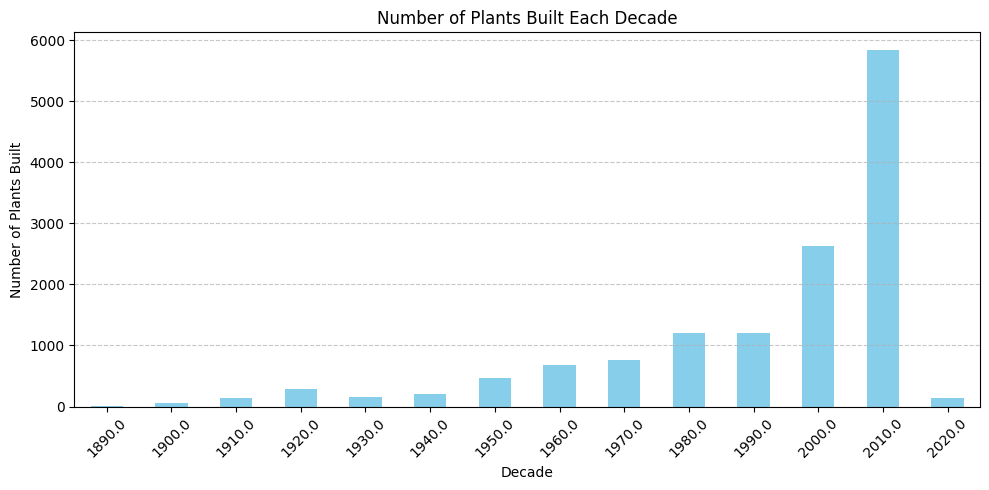

In [158]:
# Select relevant columns
columns = ['country_long', 'commissioning_year', 'primary_fuel',
           'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
           'generation_gwh_2019']

# Create a DataFrame with selected columns
df_time = numerical_data_cleaned[columns]

# Drop all empty cells
df_time = df_time.dropna()
factories_built_per_year = df_time.groupby('commissioning_year').size()

# Group the data by decade based on the commissioning year
df_time['commissioning_decade'] = (df_time['commissioning_year'] // 10) * 10

# Count the number of factories built in each decade
factories_built_each_decade = df_time.groupby('commissioning_decade').size()

# Visualize the results using a bar plot
plt.figure(figsize=(10, 5))
factories_built_each_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Plants Built')
plt.title('Number of Plants Built Each Decade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

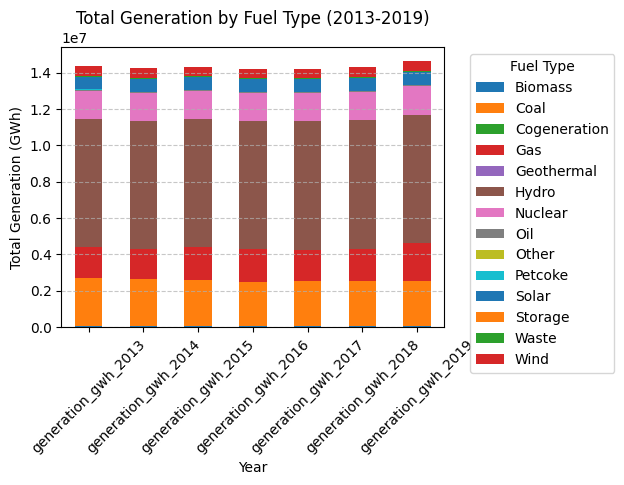

In [162]:
# Select relevant columns
fuel_columns = ['primary_fuel', 'generation_gwh_2013', 'generation_gwh_2014',
                'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
                'generation_gwh_2018', 'generation_gwh_2019']

# Create a DataFrame with selected columns
fuel_production = numerical_data_cleaned[fuel_columns]

# Group the data by primary fuel and sum the generation values across the years
fuel_production_by_type = fuel_production.groupby('primary_fuel')[['generation_gwh_2013',
                                                                   'generation_gwh_2014',
                                                                   'generation_gwh_2015',
                                                                   'generation_gwh_2016',
                                                                   'generation_gwh_2017',
                                                                   'generation_gwh_2018',
                                                                   'generation_gwh_2019']].sum()

# Transpose the DataFrame to have years on the x-axis
fuel_production_by_type_transposed = fuel_production_by_type.transpose()

# Define a custom color palette with more shades
colors = sns.color_palette("tab10", n_colors=len(fuel_production_by_type_transposed.columns))

# Visualize the results using a stacked bar plot
plt.figure(figsize=(12, 6))
fuel_production_by_type_transposed.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.title('Total Generation by Fuel Type (2013-2019)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

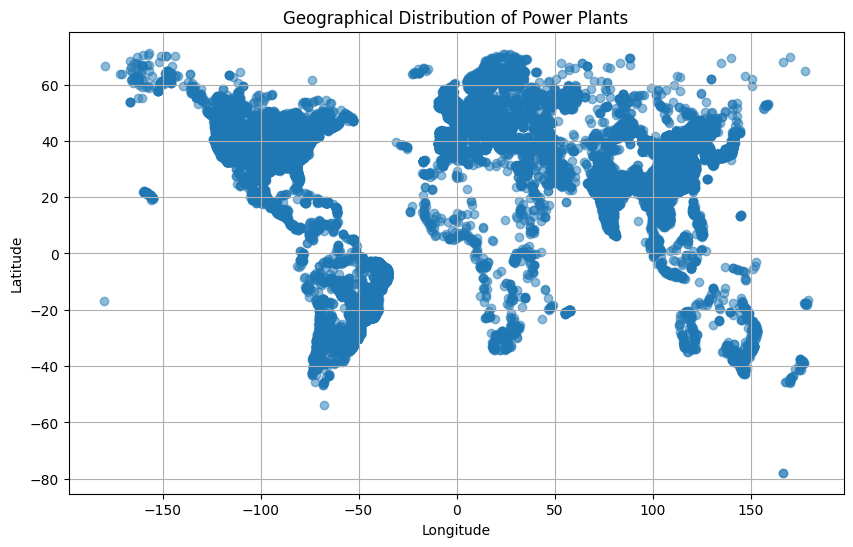

In [164]:
# Filter out rows with missing latitude and longitude data
power_plants_with_location = df.dropna(subset=['latitude', 'longitude'])

# Plot the geographical distribution of power plants
plt.figure(figsize=(10, 6))
plt.scatter(power_plants_with_location['longitude'], power_plants_with_location['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Power Plants')
plt.grid(True)
plt.show()

We can calculate the correlation between capacity and latitude to see if there is any relationship between the size of a power plant and its geographic location.

In [169]:
# Selecting relevant columns
relevant_columns = ['capacity_mw', 'latitude']
power_plants_subset = df[relevant_columns]

# Calculating the correlation between capacity and latitude
correlation = power_plants_subset.corr().loc['capacity_mw', 'latitude']

print("Correlation between capacity and latitude:", correlation)

Correlation between capacity and latitude: -0.013217591466326423


A correlation close to zero suggests that there is a very weak linear relationship between the size of a power plant (capacity) and its geographic location (latitude). In this case, the correlation coefficient being negative indicates that there might be a very slight tendency for smaller power plants to be located at slightly higher latitudes or vice versa, but the relationship is not strong.

In [173]:
# Selecting relevant columns
relevant_columns = ['capacity_mw', 'generation_gwh_2015']
power_plants_subset = df[relevant_columns]

# Drop all empty cells
power_plants_subset = power_plants_subset.dropna()

# Standardize the data
scaler = StandardScaler()
power_plants_scaled = scaler.fit_transform(power_plants_subset)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(power_plants_scaled)

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio by Principal Component:")
print(explained_variance_ratio)

Explained Variance Ratio by Principal Component:
[0.92193396 0.07806604]


In [175]:
# Retrieve the loadings of the first principal component
loadings = pca.components_[0]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, index=['capacity_mw', 'generation_gwh_2015'], columns=['PC1 Loading'])

print("Loadings of the first principal component:")
print(loadings_df)

Loadings of the first principal component:
                     PC1 Loading
capacity_mw             0.707107
generation_gwh_2015     0.707107


This means that the first principal component captures the majority of the variability in the dataset, while the second principal component captures a smaller proportion of the variability. Since both loadings are equal and positive, it means that PC1 is a balanced combination of 'capacity_mw' and 'generation_gwh_2015'.

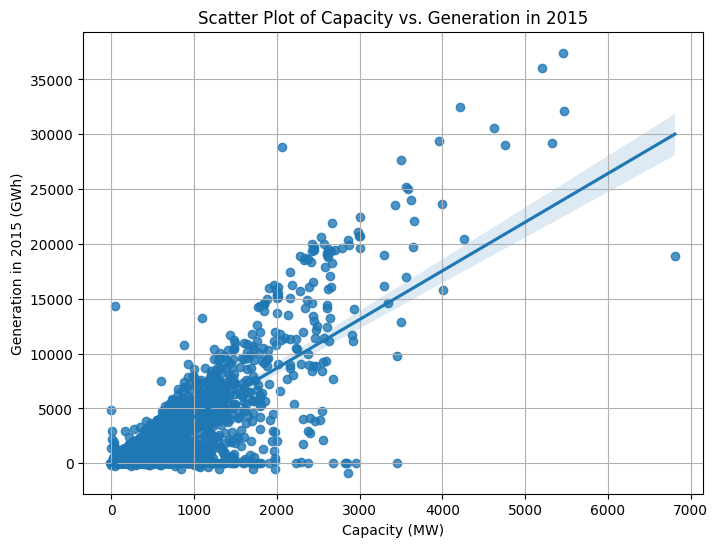

In [174]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='capacity_mw', y='generation_gwh_2015', data=power_plants_subset)
plt.title('Scatter Plot of Capacity vs. Generation in 2015')
plt.xlabel('Capacity (MW)')
plt.ylabel('Generation in 2015 (GWh)')
plt.grid(True)
plt.show()

In [178]:
# Create a new column 'total_generation' as the sum of generation across all years
numerical_data_cleaned['total_generation'] = numerical_data_cleaned[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                             'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
                             'generation_gwh_2019']].sum(axis=1)

# Display the updated DataFrame
numerical_data_cleaned.head()

,country_long,name,commissioning_year,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,mean_generation_gwh,mean_estimated_generation_gwh,total_generation
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,NaN,Hydro,313.092,313.092,313.092,313.092,313.092,313.092,313.092,123.77,162.90,97.39,137.76,119.50,NaN,130.4550,2191.644
1,Afghanistan,Kandahar DOG,NaN,Solar,43.116,43.116,43.116,43.116,43.116,43.116,43.116,18.43,17.48,18.25,17.70,18.29,NaN,17.9650,301.812
2,Afghanistan,Kandahar JOL,NaN,Solar,43.764,43.764,43.764,43.764,43.764,43.764,43.764,18.64,17.58,19.10,17.62,18.72,NaN,18.2350,306.348
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,NaN,Hydro,483.414,483.414,483.414,483.414,483.414,483.414,483.414,225.06,203.55,146.90,230.18,174.91,NaN,201.4225,3383.898
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,NaN,Hydro,857.850,857.850,857.850,857.850,857.850,857.850,857.850,406.16,357.22,270.99,395.38,350.80,NaN,357.4375,6004.950


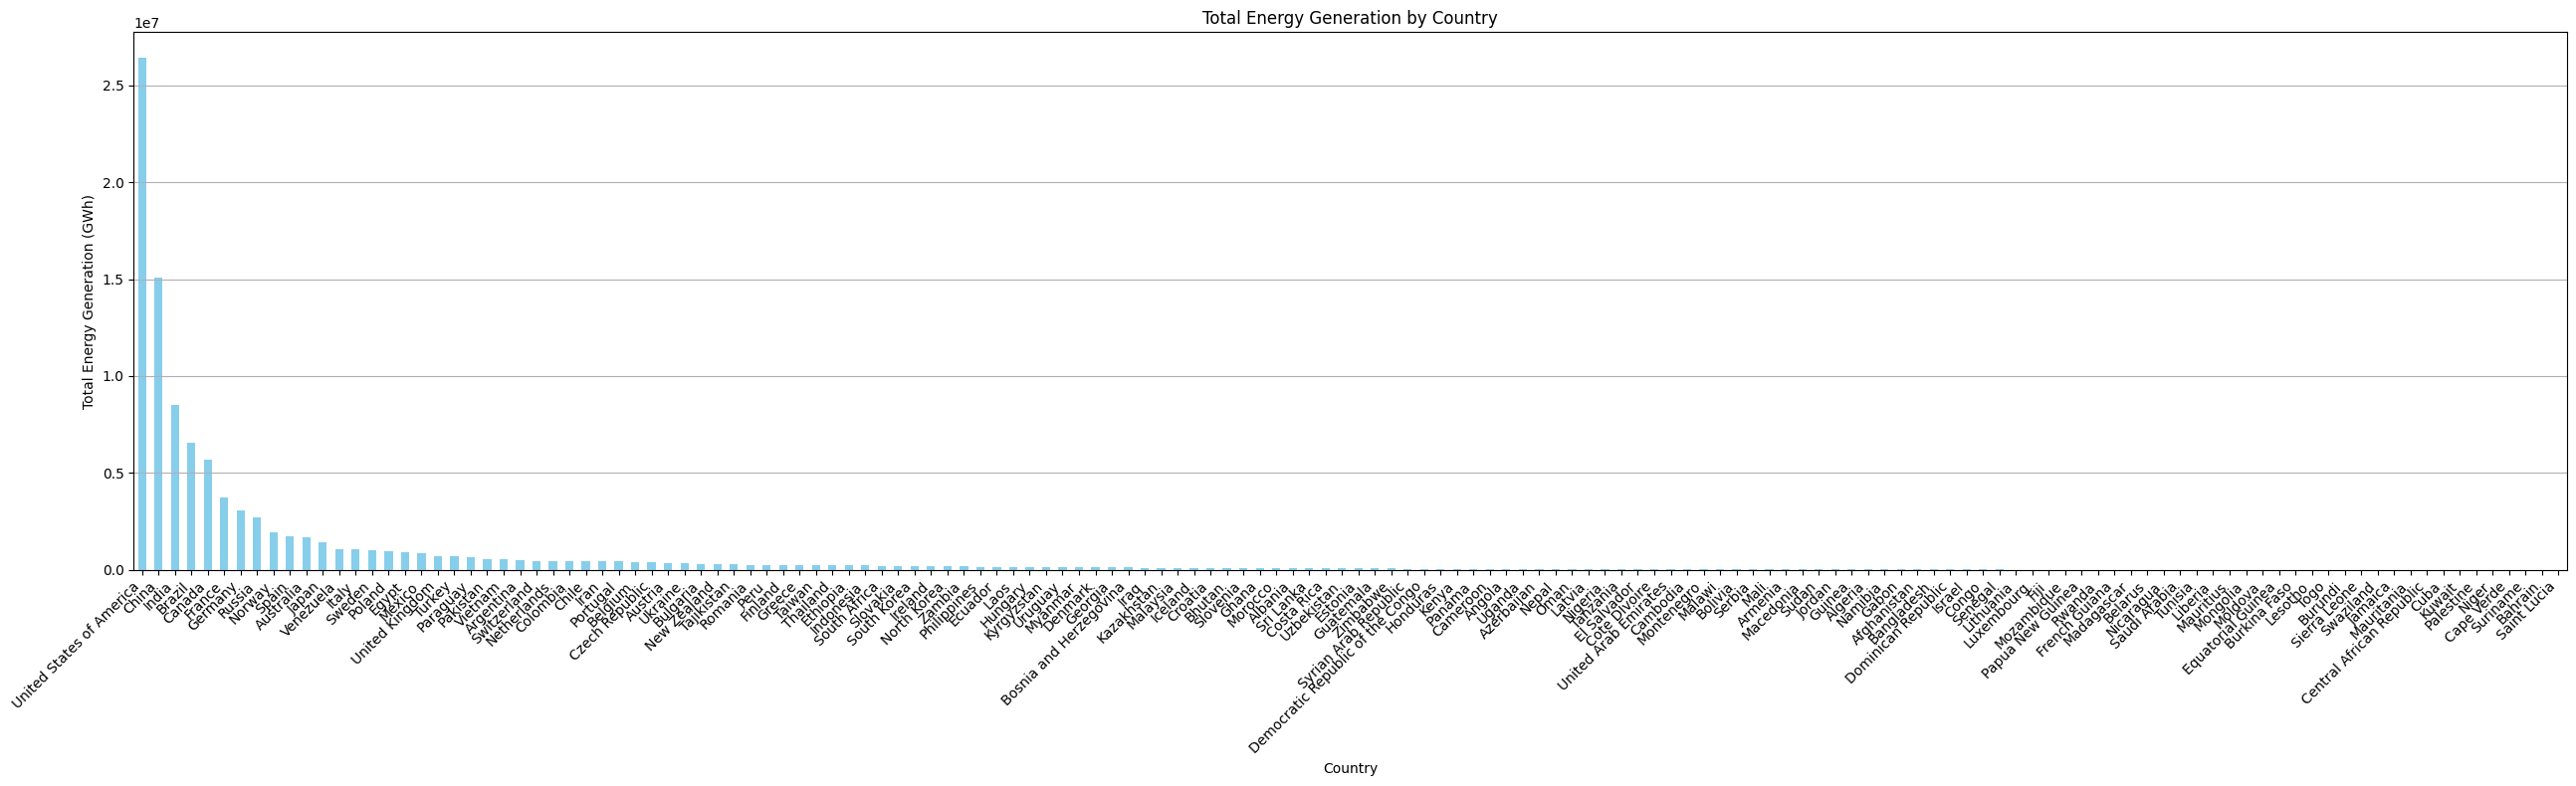

In [183]:
# Group the DataFrame by 'country_long' and sum the total generation for each country
total_generation_by_country = numerical_data_cleaned.groupby('country_long')['total_generation'].sum()

# Plotting the data
plt.figure(figsize=(26, 8))
total_generation_by_country.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Energy Generation by Country')
plt.xlabel('Country')
plt.ylabel('Total Energy Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [184]:
# Calculate the sum of 'generation_gwh_2013'
total_generation_2013 = np.sum(numerical_data_cleaned['generation_gwh_2013'].values)

In [186]:
# Calculate mean, median, and standard deviation of 'generation_gwh_2014'
mean_generation_2014 = np.mean(numerical_data_cleaned['generation_gwh_2014'].values)
median_generation_2014 = np.median(numerical_data_cleaned['generation_gwh_2014'].values)
std_generation_2014 = np.std(numerical_data_cleaned['generation_gwh_2014'].values)

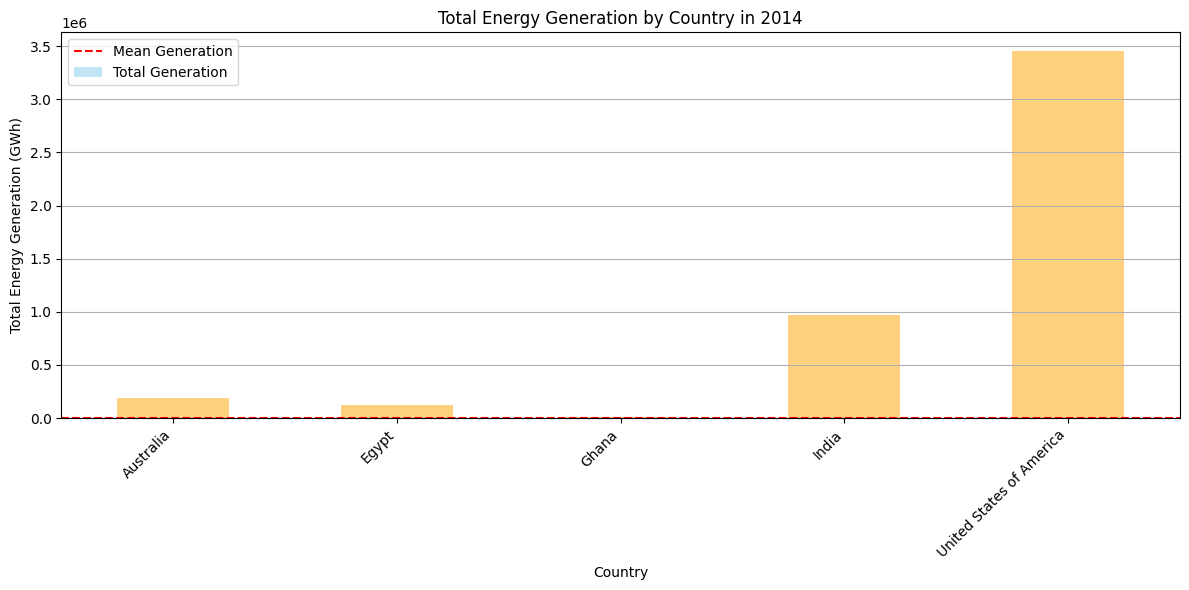

In [193]:
# Group the DataFrame by 'country_long' and sum the total generation for 2014
total_generation_2014_by_country = df.groupby('country_long')['generation_gwh_2014'].sum()

# Filter countries that exceed the mean generation value for 2014
high_generation_countries = total_generation_2014_by_country[total_generation_2014_by_country > mean_generation_2014]

# Plotting the data
plt.figure(figsize=(12, 6))
total_generation_2014_by_country.plot(kind='bar', color='skyblue', alpha=0.5)
high_generation_countries.plot(kind='bar', color='orange', alpha=0.5)
plt.axhline(y=mean_generation_2014, color='red', linestyle='--', label='Mean Generation')
plt.title('Total Energy Generation by Country in 2014')
plt.xlabel('Country')
plt.ylabel('Total Energy Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Mean Generation', 'Total Generation'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Data Loading and Cleaning: I load the dataset from a CSV file and convert the 'commissioning_year' column to datetime format, extracting only the year. Then, I select the relevant columns for analysis and drop rows with missing values in numerical columns.

Descriptive Statistics: I calculate statistics (mean, median, standard deviation) for the 'generation_gwh' columns and 'estimated_generation_gwh' columns separately. I also compare the mean values between these two sets of columns for each year ('estimated_generation_gwh' is 2.4 times less 'generation_gwh')

Filling Missing Values: I fill missing values in the 'generation_gwh' columns with the mean generation value for each row. Additionally, I fill missing values in the 'generation_gwh' columns based on the 'estimated_generation_gwh' values multiplied by 2.4.

Data Visualization: I visualize the number of plants built each decade, the total energy generation by fuel type, the geographical distribution of power plants, and the correlation between capacity and latitude.

Principal Component Analysis (PCA): I perform PCA on a subset of columns ('capacity_mw' and 'generation_gwh_2015') and visualize the principal component loadings and the relationship between capacity and generation.

Total Energy Generation by Country: I calculate the total energy generation for each country and visualize it using a bar plot.